# <center> Stabiliser l'apprentissage d'un modèle avec Keras </center>

**Source :** Cours de Franck Bardol, [LinkedIn Learning](https://www.linkedin.com/learning/decouvrir-le-deep-learning-avec-keras/bienvenue-dans-le-deep-learning-avec-keras?autoplay=true).

## Objectif
Apprendre à moduler correctement le volume de données traité durant l'apprentissage.
Pour cela nous allons apprendre l'utilité des paramètres :
* batch size
* epochs

Ces 2 paramètres sont utilisés dans la fonction d'apprentissage **fit** du modèle de Deep Learning

In [ ]:
if False:
  history = model.fit(
          X, 
          y, 
      
          # les 2 paramètres en question :
          epochs= 40, 
          batch_size = 5,
          
          # autres paramètres
          validation_split = 0.33,
          verbose = 0)

## Batch size
Le paramètre *batch_size*

Durant l'apprentissage, on groupe les données d'entrée (*X*). On réalise des groupes comprenant "*batch_size*" points. Par exemple, *batch_size* = 100 signifie 100 données d'entrée par groupes.

Si le data-set comporte 1000 données et que *batch_size* = 100 alors il y aura un nombre de batch à traiter égal à : 
volume_data_set / *batch_size*
Dans notre cas, 1000 / 100 = 10 batchs

Les données sont mélangées au sein de chaque batch. La constitution des groupes est faite au hasard.

## **Epochs**

Le paramètre *epochs* représente le nombre d'itérations de l'algorithme de Deep Learning durant l'apprentissage.

L'algorithme passe en revue toutes les données d'un *batch*. 
Pour chacune d'elle, l'algorithme génère une prédiction et calcule l'erreur associée à chaque prédiction.
C'est-à-dire, l'écart entre la valeur **réelle** et la valeur prédite.

Ensuite,  il modifie les poids des connections en fonction de la **moyenne** des erreurs constatées dans ce batch en cours.

L'ensemble de ces opérations est fait **epochs** fois

## Influence des paramètres *batch_size* et *epochs* sur l'apprentissage

Voyons à présent l'influence des paramètres *batch_size* et *epochs*  sur l'apprentissage.

Il est important de comprendre que les algorithmes de Deep Learning sont **stochastiques**
 par nature.
* la constitution des batchs est aléatoire
* l'initialisation des paramètres du réseau est aléatoire
* les données d'entrée comportent également une part d'aléa. En effet, certaines données peuvent être mal labellisées, être de mauvaises qualité, etc ....

De ce fait, certains batch peuvent entrainer l'algorithme dans une mauvaise direction. C'est pourquoi on choisit d'augmenter la **taille** des batchs afin de compenser les erreurs potentielles. La compensation est réalisée lors de la **moyenne** des erreurs au sein du batch en cours.

#### Batch_size
Augmenter la taille du **batch_size** stabilise l'apprentissage et diminue les fluctuations stochastiques dont nous avons parlé.
Mais Augmenter la taille du **batch_size**  ralentit, dans le même temps. 

Il faut alors jongler entre *stabilité* et *vitesse* de convergence.

#### Epochs
En augmentant, le nombre d'itération (*epochs*) on force en quelque sorte l'algorithme à converger.
C'est un point positif
Par contre, en cas de sur-apprentissage (*over-fitting*), augmenter le nombre d'*epochs* va encore accentuer le phénomène d'*over-fitting* . Dans ce cas, il faut, au contraire, diminuer *epochs* ou mettre en place une méthode de **early stopping**.

#### Conclusion
Les paramètres *epochs* et *batch_size* influencent l'apprentissage.
Il n'y a pas de recette miracle ou de formule permettant de fixer ces paramètres à l'avance.
Vous devrez procéder par essai et erreur pour  fixer leurs valeurs optimales.

## Implémentation avec Keras
On peut constater l'importance des paramètres avec les exemples suivants

In [ ]:
from keras import layers
from keras import models
from keras import optimizers 
from keras.callbacks import EarlyStopping


from sklearn import model_selection
from sklearn.datasets import make_circles,make_classification

import matplotlib.pyplot as pl
import numpy as np

X,y = make_classification(n_samples = 300, 
                          n_features = 20, 
                          n_informative = 2, 
                          n_classes = 2)


# nb de colonne de X (inputs)
x_input_dim = X.shape[1]

model = models.Sequential()
model.add(layers.Dense(5 , input_dim = x_input_dim ))
model.add(layers.Dense(5, activation= 'sigmoid' ))
model.add(layers.Dense(1,activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# essayer différentes valeurs de 'batch' : [5 , 10 , 15] 
# pour constater l'influence
batch = 5
history = model.fit(X, 
          y, 
          epochs= 50, 
          batch_size = batch,
          validation_split = 0.33,
          verbose = 0)

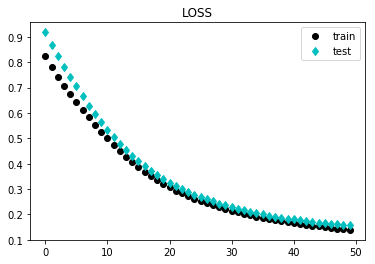

In [ ]:
pl.figure()
pl.plot(history.history['loss'], 'ko')
pl.plot(history.history['val_loss'], 'cd')
pl.title('LOSS')
pl.legend([ 'train' ,  'test'  ], loc= 'best' )
pl.show()